<a href="https://colab.research.google.com/github/daniyar-udel/PUS2024_DAbykhanov/blob/main/HW2/Citibikes_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Daniyar Abykhanov @daniyar-udel
# for UDel PUS
# This is my homework 2 of Assignment 2.

In [1]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# IDEA:
## Younger people are more likely to use bicycles for transportation than older people.

# Data: citibikes collected information for each customer's trip including date, duration, start and destination. Customers are identified by user type: Subscriber and Commuter, gender (encoded as binary W/M), age (birth year). Tus the data supports the investigation of my "theory" (the idea) based on the folliwing Null Hypothesis

# BUT: Let's divide younger people, it is going to be people which age less than 35 years old.

# NULL HYPOTHESIS:
## The mean trip duration of younger people is less than the mean trip duration of older people

## The mean trip duration of younger people is equal or higher than the mean trip duration of older people

# _$H_0$_ : mean(age younger) < mean(age older)
# _$H_1$_ : mean(age younger) >= mean(age older)


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%


## I am starting with a single month of data:  reading data from citibike csv file from May 2024

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

In [2]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

In [3]:

datestring = '2019'

# Define the URL of the zip file
url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))



In [4]:
zip_file.extractall() #extract all the files in the zipped folder locally

I am going to look in the now local files (extracted with the command above) to find what I want

In [5]:
!ls

2019-citibike-tripdata	__MACOSX  sample_data


In [6]:
!ls 2019-citibike-tripdata

10_October   12_December  2_February  4_April  6_June  8_August
11_November  1_January	  3_March     5_May    7_July  9_September


In [7]:
!ls 2019-citibike-tripdata/5_May

201905-citibike-tripdata_1.csv	201905-citibike-tripdata_2.csv


In [8]:
# Read the CSV file from the zip file
cbMay19 = pd.read_csv(datestring + '-citibike-tripdata/5_May/' + datestring + '05-citibike-tripdata_1.csv')

In [9]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [10]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [11]:
#add an age object
cbMay19["age"] = 2024 - cbMay19['birth year']

In [12]:
#clean up
cbMay19.drop(['gender', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)

In [13]:
cbMay19.head()

,tripduration,age
0,139,41
1,754,55
2,2308,46
3,143,27
4,138,57


### Lets check data for extremly big ages and outliers


### Lets plot the age

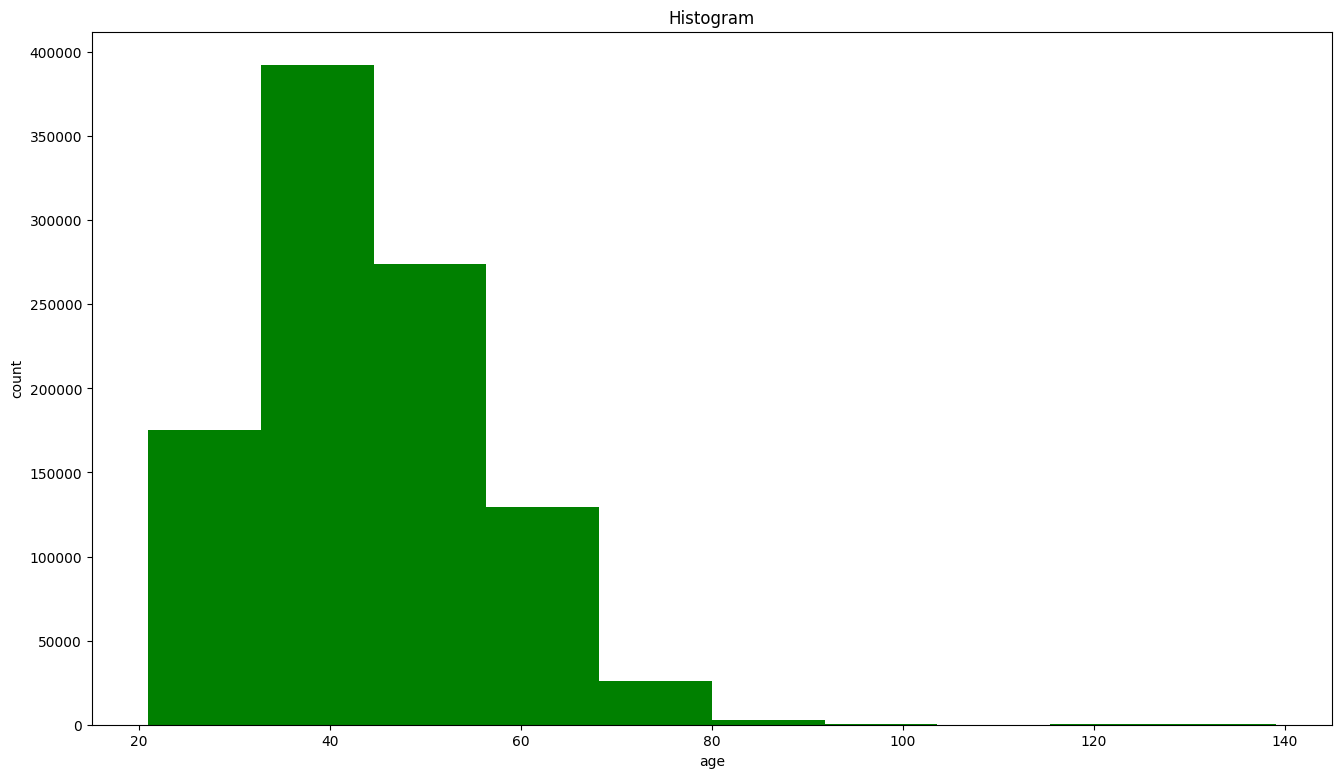

In [14]:
fig = plt.figure()
fig.set_size_inches(16,9)
plt.hist(cbMay19.age, color = 'green')
plt.title('Histogram')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### I don't think that we people who are older 80 years old use citibike very often, so let's delete this people who are older than 80 years old


In [15]:
cbMay19 = cbMay19[cbMay19['age'] < 80]

In [16]:
cbMay19.head()

,tripduration,age
0,139,41
1,754,55
2,2308,46
3,143,27
4,138,57


# Our data is ready and we can start test to check both hypothesis
